In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("Flu_Classification.csv")
df.head()

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,Diagnosis
0,67.0,38.11,F,unknown,Yes,Yes,unknown,No,unknown,No,unknown,H1N1
1,29.0,0.00,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
2,22.0,0.00,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
3,20.0,36.56,F,unknown,Yes,Yes,unknown,No,unknown,Yes,unknown,H1N1
4,21.0,0.00,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1


In [3]:
df.shape

(1485, 12)

In [4]:
# Converting string categorical variables into numeric categorical variables

def convert(df, n, k) :
    for col in df.iloc[:,n:k].columns:
        df[col] = df[col].astype('category').cat.codes
        
    return df

In [5]:
# Function to create a dendogram to find optimal number of clusters

def dendogram (df, method) :
    
    dendrogram = sch.dendrogram(sch.linkage(df, method  = method))
    plt.title('Dendrogram')
    plt.xlabel('Patients')
    plt.ylabel('Euclidean distances')
    plot = plt.show()
    
    return plot

In [10]:
# Agglomerative clustering with visualisation

def agglomerative_clustering (df, n, affinity, linkage):
    """Function to perform agglomerative clustering
    Args:
        df (dataframe): dataframe of points to be clustered
        n (integer): number of clusters
    """    
    hc = AgglomerativeClustering(n_clusters = n, affinity = affinity, linkage = linkage)
    df["cluster"] = hc.fit_predict(df)

    pca = PCA(2)

    df['PC1'] = pca.fit_transform(df)[:,0]
    df['PC2'] = pca.fit_transform(df)[:,1]


    plot = sns.scatterplot(data=df,x="PC1",y="PC2",hue=df['cluster'])
    
    return df, plot

In [16]:
# PCA + Agglomerative clustering
def pca_agglomerative(df, n, affinity, linkage):
    """Function to perform agglomerative clustering
    Args:
        df (dataframe): dataframe of points to be clustered
        n (integer): number of clusters
    """    
    
    pca = PCA(2)
    
    df['PC1'] = pca.fit_transform(df)[:,0]
    df['PC2'] = pca.fit_transform(df)[:,1]
    
    hc = AgglomerativeClustering(n_clusters = n, affinity = affinity, linkage = linkage)
    df["cluster"] = hc.fit_predict(df[['PC1', 'PC2']])
 
    plot = sns.scatterplot(data=df[['PC1', 'PC2']],x="PC1",y="PC2",hue=df['cluster'])
    
    return df, plot  

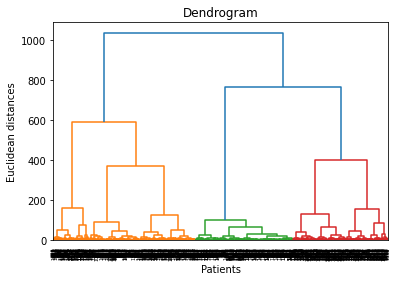

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,cluster,PC1,PC2
0,67.0,38.11,0,2,1,1,2,0,2,0,1,0,46.088456,-6.433248
1,29.0,0.00,1,2,2,2,2,2,2,2,1,1,-2.800189,16.192415
2,22.0,0.00,0,2,2,2,2,2,2,2,1,1,-9.362307,13.770060
3,20.0,36.56,0,2,1,1,2,0,2,1,1,0,1.468368,-21.259705
4,21.0,0.00,1,2,2,2,2,2,2,2,1,1,-10.302711,13.418542


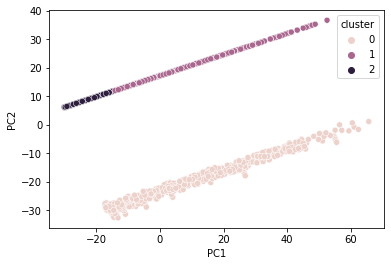

In [14]:
df = convert(df, 2,12)
df_cluster = df.iloc[:,0:11]

dendogram(df_cluster,"ward")

df_cluster1, plot1 = agglomerative_clustering(df_cluster, 3, 'euclidean', 'ward')

df_cluster1.head()

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,cluster,PC1,PC2
0,67.0,38.11,0,2,1,1,2,0,2,0,1,0,65.178920,-9.097986
1,29.0,0.00,1,2,2,2,2,2,2,2,1,1,-3.960065,22.899533
2,22.0,0.00,0,2,2,2,2,2,2,2,1,1,-13.240302,19.473806
3,20.0,36.56,0,2,1,1,2,0,2,1,1,0,2.076586,-30.065763
4,21.0,0.00,1,2,2,2,2,2,2,2,1,1,-14.570234,18.976684


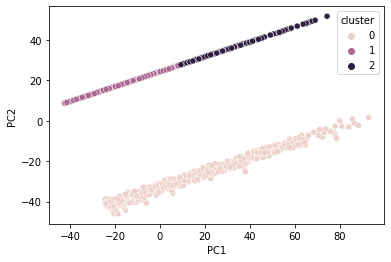

In [17]:
df_cluster2, plot2 = pca_agglomerative(df_cluster, 3, 'euclidean', 'ward')

df_cluster2.head()

In [18]:
# Visualization of clusters grouping

def cluster_grouping(df) :
    
    cluster_list = []
    n = df.cluster.unique()
    
    for i in n :
        cluster_list.append(df[df['cluster'] == i])
        
    return cluster_list
    

In [20]:
clusters = cluster_grouping(df_cluster1)

In [21]:
clusters[0]

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,cluster,PC1,PC2
0,67.0,38.11,0,2,1,1,2,0,2,0,1,0,65.178920,-9.097986
3,20.0,36.56,0,2,1,1,2,0,2,1,1,0,2.076586,-30.065763
7,60.0,38.17,1,2,0,1,2,0,2,0,1,0,55.937554,-12.629774
8,46.0,38.61,0,2,1,1,2,0,2,0,1,0,37.571731,-20.057705
10,53.0,36.22,1,2,0,0,2,0,2,0,1,0,45.712886,-13.491141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,79.0,37.80,1,2,1,2,2,2,2,2,1,0,80.888882,-2.705808
1430,50.0,39.00,1,2,1,1,2,2,2,2,1,0,43.026626,-18.527127
1433,23.0,38.70,0,2,1,2,1,2,0,2,1,0,7.075863,-31.408577
1436,61.0,39.00,1,2,1,1,1,2,2,2,1,0,57.617768,-13.127454
